# ECS784 - Lab 4
# Machine learning with Scikit-Learn

 * This lab covers:
 
     * Dimensionality reduction with Principal Component Analysis (PCA)
     * Linear regression 
     * k-nearest neighbour (kNN)
     * Support vector machines (SVMs)
     * k-means clustering
     * Gaussian Mixture Models (GMMs)
     
**Notebook Version History**

 * V2 10/11/2022: supress future feature warnings from Matplotlib and Scikit-learn
 * V2.1 14/02/2024: change the matplotlib calls which request a 3D plot so that the scatter plot in the PCA section is drawn out rather than just printing out text. Set the environment variable "OMP_NUM_THREADS" in the first code section to stop warning about memory leaks from the Kmeans algorithms. Both of these problems just occurred from some versions of Scikit-Learn
 * V2.2 13/02/2025: use latest "algorithm choice" image. nicer formatting of NumPy arrays, stop all warnings and errors, try different initialisation with GMM

In [1]:
# The necessary imports first

import os
os.environ["OMP_NUM_THREADS"] = '1'  # Stops warnings about memory leaks from kmeans seen on some platforms

import numpy as np
import matplotlib.pyplot as plt     
import seaborn as sns; sns.set()
from matplotlib import MatplotlibDeprecationWarning
%matplotlib inline

np.set_printoptions(precision=3, suppress=True, formatter={'float': lambda x: f'{x:7.3f}'}, linewidth=100)

import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

In [2]:
from IPython.display import Image
Image(url = "https://scikit-learn.org/stable/_downloads/b82bf6cd7438a351f19fac60fbc0d927/ml_map.svg")
# The image below provides a quick overview of the algorithms available in scikit-learn
# and gives an indication of which algorithms to use - but it is only a *guide*
# We won`t be covering all the algorithms

## Machine learning algorithms

# 1. Dimensionality reduction with Principal Component Analysis (PCA)

### We will load the Iris flower data set, again from the scikit-learn library, to illustrate PCA

This data set captures data from three different species of iris (Iris silky, virginica Iris, and Iris versicolor). The data values correspond to the length and width of the sepals and the length and width of the petals.
The data set comes with the scikit-learn library in the form of a 150x4 NumPy array.

- Features/variables in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm


- Target variable to predict consists of the following categories:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with functions to load it into numpy arrays:

In [3]:
# Let's import the data set:
from sklearn import datasets
iris = datasets.load_iris() 

In [4]:
# Let's view the features (four variables) of first five rows of the data set: 
# Each row corresponds to an iris flower
print(iris.data[:5, :])

[[  5.100   3.500   1.400   0.200]
 [  4.900   3.000   1.400   0.200]
 [  4.700   3.200   1.300   0.200]
 [  4.600   3.100   1.500   0.200]
 [  5.000   3.600   1.400   0.200]]


In [5]:
iris.data.shape # 150 samples over 4 variables

(150, 4)


* The array contains 150 elements (or samples), each containing 4 numeric values: the size and width of sepals and petals respectively.

In [6]:
# Let's view the target variable of the data set.

iris.target # 150 classifications - 3 different classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### The target comprises of 150 items with three possible integer values (0, 1 and 2) which correspond to the three species of iris.


In [7]:
iris.target_names # to view the species corresponding to each integer category.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Visualising the data

To better understand the data, we can use Matplotlib to produce a scatter plot that displays the three different species in three different colors. 

In this first visualisation, the x-axis represents the length of the sepal and the y-axis the width of the sepal. This means that in this first visualisation we make use just two, out of the four, columns/variables/features to visualise their relationship with reference to the three different types of iris flower.

In [8]:
# ensure we have the necessary imports  

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import datasets
iris = datasets.load_iris()


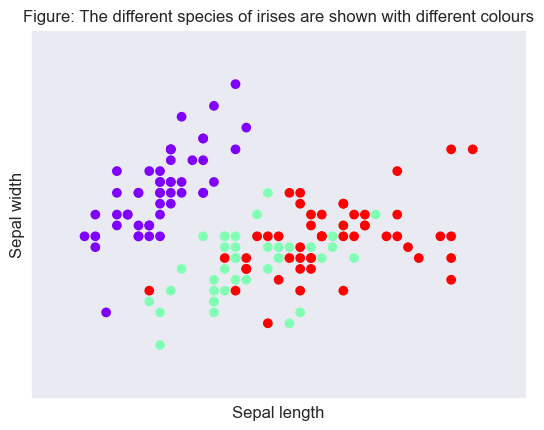

In [9]:
x = iris.data[:,0]  #X-Axis - sepal length
y = iris.data[:,1]  #Y-Axis - sepal width
species = iris.target     #Species

x_min, x_max = x.min() - .5,x.max() + .5
y_min, y_max = y.min() - .5,y.max() + .5

#SCATTERPLOT
plt.figure()
plt.scatter(x,y, c=species,cmap='rainbow')


plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(()) 

plt.title('Figure: The different species of irises are shown with different colours')
plt.show();

 * As shown in the Figure above, the Iris setosa flowers are shown in purple, Green is used for the Iris versicolor, and red for the Iris virginica.
 * You can see how the Iris setosa features differ from the other two, forming a cluster of purple dots separate from the others.


### Examining the dimensions of petals

We will now repeat the above to examine the dimensions of petals:

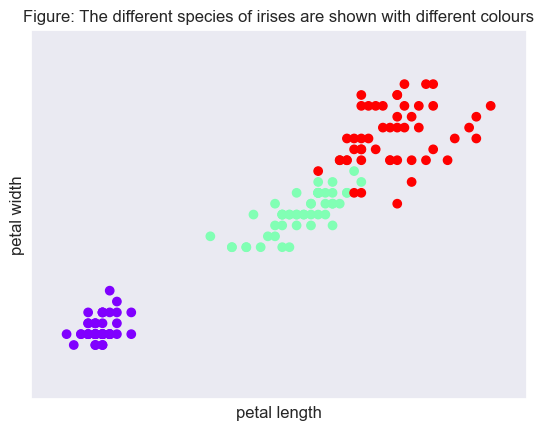

In [10]:
x = iris.data[:,2]  #X-Axis - petal length
y = iris.data[:,3]  #Y-Axis - petal width
species = iris.target     #Species

x_min, x_max = x.min() - .5,x.max() + .5
y_min, y_max = y.min() - .5,y.max() + .5

#SCATTERPLOT
plt.figure()
plt.title('Iris Dataset - Classification By Sepal Size')
plt.scatter(x,y, c=species,cmap='rainbow')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(()) 

plt.title('Figure: The different species of irises are shown with different colours')
plt.show();

 * In this case the division between the three species is much more evident. 
 * As you can see you have three different clusters.

## Now let's apply Principal Component Analysis (PCA)

 * We have seen how the three species can be characterised taking into account four measurements of the petals and sepals size.
 * What if we want to reduce the dimensions from 4 down to 3, without removing a variable?
 * Principal Component Analysis (PCA), allows us to do just that, aiming to minimise the loss of information.
 * New/combined features are  called principal components. 
 * We will use PCA to reduce the features from 4 to 3, and then plot the results within a 3D scatterplot. 


#### PCA in scikit-learn


In [11]:
 # The Scikit-learn function fit_transform() belongs to the PCA object and enables us to perform dimensionality reduction. 
 # To use that function, we first you need to import the PCA module sklearn.decomposition.
from sklearn.decomposition import PCA

In [12]:
# We then have to define the object constructor using PCA(), along with the number of new 
# dimensions (principal components) as the parameter (in this example it is 3). 

print("The first five rows of the original four variables are:")
print(iris.data[:5, :])


pca = PCA(n_components=3)

# Now we analyse the data and determine what the 3 components consist of - that is, what mixtures of
# the original four variables each component consists of

pca.fit(iris.data)  
print("\n\nThe three PCA components are made up of these mixtures of the original four variables:")
print(" Component    Sep Len Sep Wid Pet Len Pet Wid ")
print("===========   ======= ======= ======= =======")
for i, component in enumerate(pca.components_):
    print("{:>10d}   {}".format(i, component))

# Finally we call the fit_transform() function, passing the four-dimensional Iris Dataset as input.

x_reduced = pca.transform(iris.data)
print('\n\nReduced data now has shape {}, with first five rows being:'.format(x_reduced.shape))
print("  Comp. 0 Comp. 1 Comp. 2  ")
print("  ======= ======= =======")
print(x_reduced[:5, :])

print("\n\nWe can approximately reconstruct the original values from the PCA components:")
print("  Sep Len Sep Wid Pet Len Pet Wid ")
print("  ======= ======= ======= =======")

X_reconstructed = np.dot(x_reduced, pca.components_) + pca.mean_
print(X_reconstructed[:5, :])



The first five rows of the original four variables are:
[[  5.100   3.500   1.400   0.200]
 [  4.900   3.000   1.400   0.200]
 [  4.700   3.200   1.300   0.200]
 [  4.600   3.100   1.500   0.200]
 [  5.000   3.600   1.400   0.200]]


The three PCA components are made up of these mixtures of the original four variables:
 Component    Sep Len Sep Wid Pet Len Pet Wid 
===========   ======= ======= ======= =======
         0   [  0.361  -0.085   0.857   0.358]
         1   [  0.657   0.730  -0.173  -0.075]
         2   [ -0.582   0.598   0.076   0.546]


Reduced data now has shape (150, 3), with first five rows being:
  Comp. 0 Comp. 1 Comp. 2  
  ======= ======= =======
[[ -2.684   0.319  -0.028]
 [ -2.714  -0.177  -0.210]
 [ -2.889  -0.145   0.018]
 [ -2.745  -0.318   0.032]
 [ -2.729   0.327   0.090]]


We can approximately reconstruct the original values from the PCA components:
  Sep Len Sep Wid Pet Len Pet Wid 
  ======= ======= ======= =======
[[  5.099   3.501   1.401   0.198]
 [  

In [13]:
# We can use a 3D scatterplot to visualise the new features, using the mpl_toolkits.mplot3d module in matplotlib. 
# Ensure the necessary imports are loaded
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

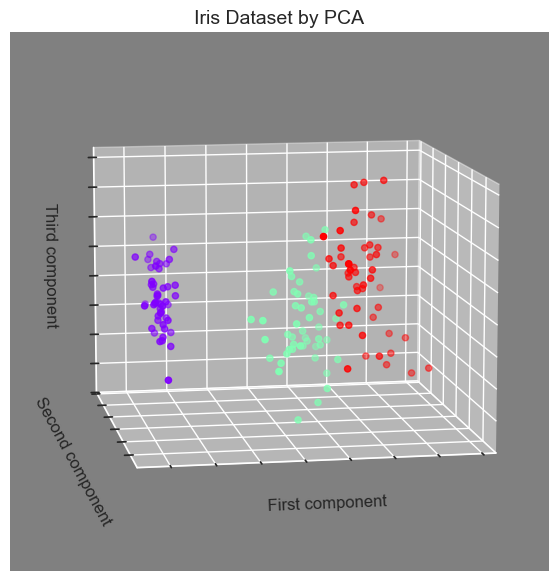

In [14]:
pca = PCA(n_components=3)
pca = pca.fit(iris.data)
x_reduced = pca.transform(iris.data)

species = iris.target     #Species

#SCATTERPLOT 3D
fig = plt.figure(figsize=(14,7))  # KK - just specify figure size
ax = fig.add_subplot(projection='3d')  # this is how we specify 3D plot now
ax.set_title('Iris Dataset by PCA', size=14)
ax.scatter(x_reduced[:,0],x_reduced[:,1],x_reduced[:,2], c=species,cmap='rainbow')
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
ax.set_zlabel('Third component')
ax.set_facecolor('gray')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_box_aspect(aspect=None, zoom=1)
ax.view_init(elev=10, azim=-100)


plt.show();

The three species of iris are well characterised with respect to each other to form a cluster.

### Choosing the Number of Components

 * How do you decide how many components to keep when applying dimension reduction via PCA ?
 * A good way to determine this is by looking at the **explained variance** as a function of the components


### NOTE: 
More examples on PCA in notebooks/04.1-Dimensionality-PCA.ipynb

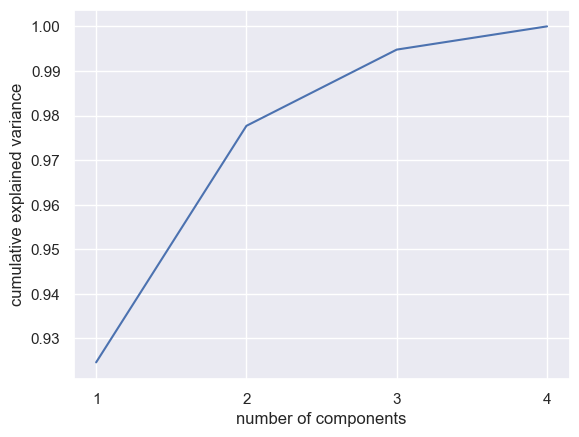

In [15]:
sns.set()

pca = PCA().fit(iris.data)
plt.plot([1, 2, 3, 4], np.cumsum(pca.explained_variance_ratio_)) #plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks([1, 2, 3, 4])  
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show();

 * It appears that keeping first three components capture more than 99% variability in the data.
 * This illustration was based on a toy-data with only four features. We normally do not need to apply dimensionality reduction to such simple data sets.
 * Dimensionality reduction generally makes sense for data sets that contain many more variables, or very low sample size with respect to the number of variables (i.e., limited data samples).

## 2. Linear Regression 

#### Linear Regression: The Least Squares Regression

 * Linear regression is a procedure that uses data contained in the training set to build a linear model. The most simple case is based on the equation of a straight line  with the two parameters b and c to characterize it. These parameters will be calculated so as to make the sum of squared residuals as small as possible.
 
 	y = b*x + c 
    
    Where x is the training set, y is the target, b is the slope, and c is the intercept of the straight line  represented by the model. 


To use linear regression in scikit-learn we must first import the linear_model module and then use the LinearRegression() constructor to create a predictive model.

In [16]:
from sklearn import linear_model
linreg = linear_model.LinearRegression() 

## Example of linear regression on the diabetes dataset 1

This data set comes with scikit-learn. It consists of 442 samples and 10 training variables, plus a target variable.

The 10 training variables are age, sex, body mass index, average blood pressure, and six blood serum measurements, for each of n = 442 diabetes patients.

The target variable (column 11) is a quantitative measure of disease progression one year later.

Remember we optimise 'x' (the 10 training variables) against 'y' (the target variable) such that the prediction of 'y' given 'x' is maximised.

#### Note: Each of the 10 training variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1); i.e., they have been normalised to have values between -0.2 < x < 0.2

This process is also known as standardisation: the process of placing different variables on the same scale. In regression analysis, there are some scenarios where it is crucial to standardise/normalise your independent variables or risk obtaining misleading results.

##### Prepare the data :
We separate the 442 patients into a training set (the first 422 patients) and a test set (the last 20 patients).

In [17]:
from sklearn import datasets            

# Note here we are loading a data set that comes with scikit-learn.
# For your coursework you will have to find your own data set, 
# and create the training and test arrays based on your preferences.
diabetes = datasets.load_diabetes() # get the diabetes dataset vailable in scikit-learn
print("The feature variables range between {:.3f} and {:.3f}".format(diabetes.data.min(), diabetes.data.max()))
print("The target variable ranges between {} and {}".format(diabetes.target.min(), diabetes.target.max()))


The feature variables range between -0.138 and 0.199
The target variable ranges between 25.0 and 346.0


In [18]:
x_train = diabetes.data[:-20]   # save the first 422 samples of the 10 feature variables in this training array
y_train = diabetes.target[:-20] # save the first 422 samples of the 1 target variable in this training array 
x_test = diabetes.data[-20:]    # save the last 20 samples of the 10 variables in this training array
y_test = diabetes.target[-20:]  # save the last 20 samples of the 1 target variable in this training array

In [19]:
x_train.shape # the first 422 samples of the 10 variables

(422, 10)

In [20]:
y_train.shape # the first 422 samples of the target variable disease 

(422,)

In [21]:
x_test.shape # the last 20 samples of the 10 variables

(20, 10)

In [22]:
y_test.shape # the last 20 samples of the target variable disease 

(20,)

In [23]:
print("The first 5 rows of the training feature variables (to 3dp) are:\n{}".format(x_train[:5, :]))

The first 5 rows of the training feature variables (to 3dp) are:
[[  0.038   0.051   0.062   0.022  -0.044  -0.035  -0.043  -0.003   0.020  -0.018]
 [ -0.002  -0.045  -0.051  -0.026  -0.008  -0.019   0.074  -0.039  -0.068  -0.092]
 [  0.085   0.051   0.044  -0.006  -0.046  -0.034  -0.032  -0.003   0.003  -0.026]
 [ -0.089  -0.045  -0.012  -0.037   0.012   0.025  -0.036   0.034   0.023  -0.009]
 [  0.005  -0.045  -0.036   0.022   0.004   0.016   0.008  -0.003  -0.032  -0.047]]


Now let's train the model using the fit() function.

In [24]:
linreg.fit(x_train,y_train) # train the model with x such that it maximises y
# note we have not given any of the test data (the last 20 samples) to the regression method.

LinearRegression()

If you wish, you could view the ten 'b' coefficients (refer to the equation above) calculated for each variable, using the coef_ method.

In [25]:
linreg.coef_ # these are the training coefficients
print("The intercept of the fitted line is {:.3f} and the coefficients are:\n{}".format(linreg.intercept_, linreg.coef_))

The intercept of the fitted line is 152.764 and the coefficients are:
[  0.306 -237.636 510.538 327.730 -814.112 492.800 102.841 184.603 743.509  76.097]


We can test the linear regression model on the test data, by passing the test data set as the parameter. The model will take those series of 'x' inputs and generate a 'y' output for each sample size.

In [26]:
predicted = linreg.predict(x_test) # input the test set x (10 variables, 20 sample size)
print("\nFirst five predicted target values are: {}".format(predicted[:5]))
print("         ... compared to actual values: {}".format(y_test[:5]))



First five predicted target values are: [197.619 155.440 172.889 111.533 164.794]
         ... compared to actual values: [233.000  91.000 111.000 152.000 120.000]


### Evaluating the quality of the prediction

The score() function returns the Coefficient of Determination which is an appropriate score for a regression model. 

It is based on residual sum of sqaures but adjusted to vary between -1.0 (worst) and 1.0 (perfect).

In [27]:
test_score = linreg.score(x_test, y_test) # variance is measured between predicted and observed values.

print("Score on test data {:.3f}".format(test_score))
# This is a rather simple model, so we don`t expect highly accurate predictions

Score on test data 0.585


### Linear regression - predictions when given information about just one variable

For example, we might be given information about 'age' only (the first variable in this case).

In [28]:
# setup these arrays as before
x_train = diabetes.data[:-20]   # the 10 training variables 'x'
y_train = diabetes.target[:-20] # the training target 'y'
x_test = diabetes.data[-20:]    # the 10 test variables 'x'
y_test = diabetes.target[-20:]  # the observed values 'y'

# We now take the first variable (remember counting starts from 0 and not from 1)

x0_test = x_test[:,0]              # get the first test variable 'x' - age
x0_test = x0_test[:,np.newaxis]

x0_train = x_train[:,0]            # get the first training variable 'x' - age
x0_train = x0_train[:,np.newaxis]

### Recall that the dataset is already in normalised format
 * All features are scaled to mean centered and values ranges between -0.2 < x < 0.2

In [29]:
# How to print the values of the first and second variables, etc

print(x_test[:,0]) # prints the normalised values of the first variable
print(x_test[:,1]) # prints the normalised values of the second variable

[ -0.078   0.009   0.002  -0.078   0.031  -0.035   0.049  -0.042  -0.009   0.071   0.009  -0.027
   0.016  -0.013  -0.056   0.042  -0.006   0.042  -0.045  -0.045]
[  0.051   0.051   0.051  -0.045   0.051   0.051   0.051  -0.045  -0.045   0.051  -0.045  -0.045
  -0.045  -0.045  -0.045   0.051   0.051   0.051  -0.045  -0.045]


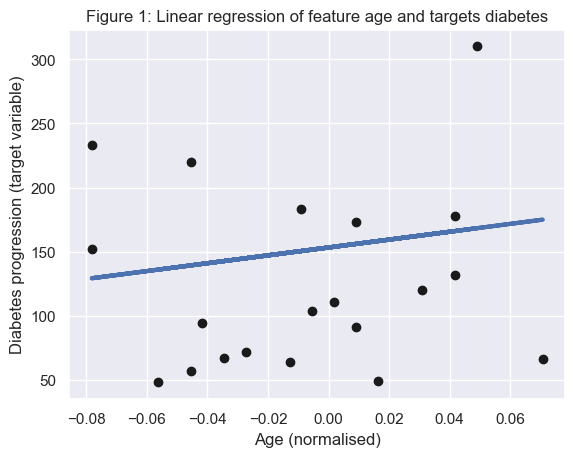

Score using just Age feature is -0.133 (i.e. not very good)


In [30]:
# Let's train the linear regression 

linreg = linear_model.LinearRegression()    # initialise linear regression
linreg.fit(x0_train,y_train)     # finds the best model for age 'x' in predicting diabetes 'y' 

# let's now use this model to predict the test data
y = linreg.predict(x0_test) # give the model the 'age' test data 'x'

# Plot all the test data points
plt.scatter(x0_test,y_test,color='k')       # visualise the results

# Plot the line
plt.plot(x0_test,y,color='b',linewidth=3)
plt.xlabel('Age (normalised)')
plt.ylabel('Diabetes progression (target variable)')

plt.title('Figure 1: Linear regression of feature age and targets diabetes')

plt.show();

print("Score using just Age feature is {:.3f} (i.e. not very good)".format(linreg.score(x0_test, y_test)))

#### Figure 1 shows the blue line representing the linear correlation between the age of patients and the diabetes disease progression.


There are 10 variables (in this data set) we could have used to predict diabetes. We can repeat the above process for the remaining 9 variables.

In [31]:
# Reinitialise arrays

x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]
x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]

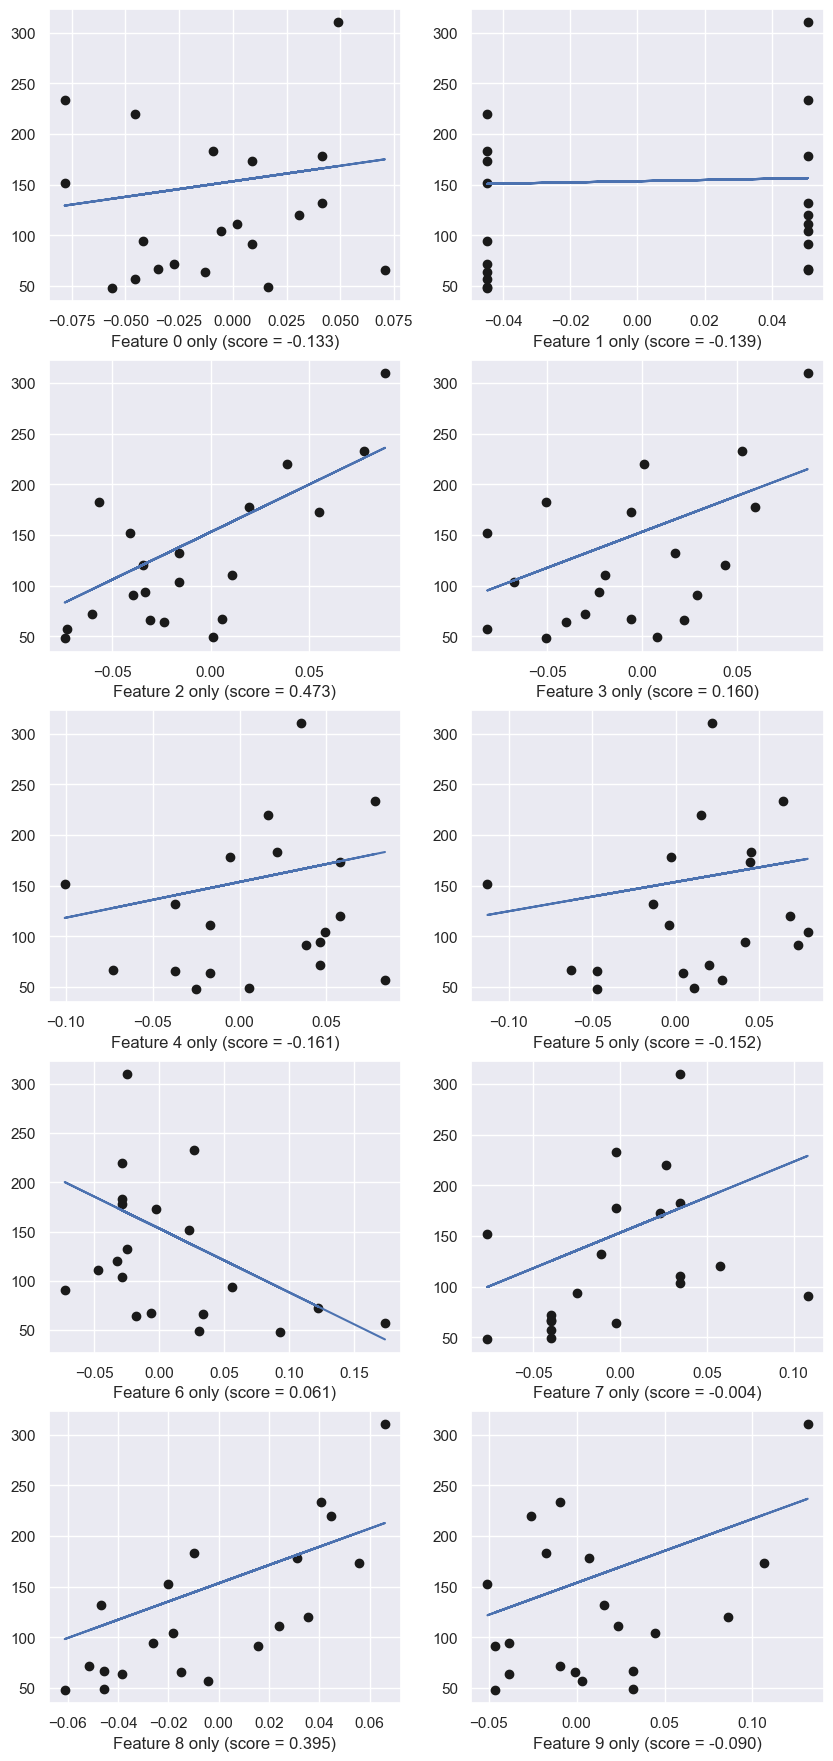

In [32]:
# use for loop to iterate over each variable 'x' to train the model and generate predictions

plt.figure(figsize=(10,22))

for f in range(0,10):
    xi_test = x_test[:,f]
    xi_train = x_train[:,f]
    xi_test = xi_test[:,np.newaxis]
    xi_train = xi_train[:,np.newaxis]
    linreg.fit(xi_train,y_train)
    y = linreg.predict(xi_test)
    score = linreg.score(xi_test, y_test)
    
    plt.subplot(5,2,f+1)
    plt.scatter(xi_test,y_test,color='k')
    plt.xlabel('Feature {} only (score = {:.3f})'.format(f, score))
    plt.plot(xi_test,y,color='b',linewidth=1.5)
plt.show();

Each of the 10 figures above depicts the linear correlation between each of the 10 variables 'x' and target 'y' diabetes. 

# 3. K-Nearest Neighbor (KNN)

 * Recall that a problem of kNN is that it is not suitable for high-dimensionality problems (recall curse of dimensionality).

 * The k-Nearest Neighbors classifier is one of the simplest classifiers.
 * kNN searches the training set to find the observation that most closely approaches the new test sample.
 * We will apply kNN to the iris flower data set, for classification; i.e., the task of kNN is to figure out to the most probable iris flower class given its four features.


### Training and test data sets

 * The data set contains 150 samples. We need to determine the split between training and test data. 
 * The part of the dataset held back to do the validation, or testing, is often also called a **"hold out"** set. 
 * We have to divide the data set into two parts. However, it is wise to randomly mix the array elements before we separate the data. 
 * This is important because data are often collected or arranged in a particular order, and you may have noticed from the PCA analysis above that this appears to be the case with the Iris data set (i.e., the items are sorted by species). 
 * We will use a NumPy function called **random.permutation()** to randomise the data. 

#### Preparing the data

The data set consists of 150 samples. We will use 140 samples for training and 10 for testing.

In [33]:
import numpy as np
from sklearn import datasets
np.random.seed(0)
iris = datasets.load_iris()

x = iris.data
y = iris.target

i = np.random.permutation(len(iris.data)) # shuffles the elements

x_train = x[i[:-10]]    # take the first 140 as training set
y_train = y[i[:-10]]
x_test = x[i[-10:]]     # take the last 10 as test set
y_test = y[i[-10:]] 


#### Applying the KNN classifier

 * To apply the kNN algorithm: 
 * Import the KneighborsClassifier and call the constructor of the classifier, then train it with the fit() function. 

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

 * Now we have a learnt model trained with 140 samples.
 * We will test it on the 10 previously unseen test samples. 
 * To generate predictions we use the predict() function. 
 * We evaluate the model by comparing the predicted outcomes to the observed outcomes contained in y_test.


#### Evaluating the learnt kNN predictive model

In [35]:
knn.predict(x_test) # generate the predictions

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [36]:
y_test # view the observed outcomes (remember these are the true/correct outcomes)


array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

By comparing the two above arrays, we notice that all but one classes have been classified correctly. In other words, the model predicted 9 out of 10 classes correctly.


### Visualise the decision boundaries 

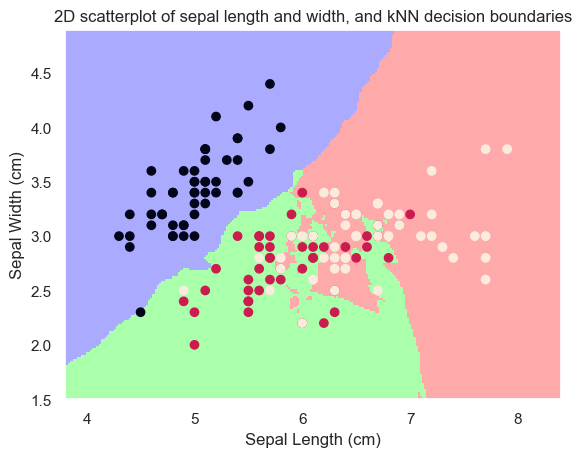

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
x = iris.data[:,:2]      #X-Axis - sepal length-width (we will visualise petals later)
y = iris.target          #Y-Axis - species

x_min, x_max = x[:,0].min() - .5,x[:,0].max() + .5
y_min, y_max = x[:,1].min() - .5,x[:,1].max() + .5

#MESH
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#################################################################################
knn = KNeighborsClassifier()
knn.fit(x,y)
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
#################################################################################

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light,shading='auto')

#Plot the training points
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.title('2D scatterplot of sepal length and width, and kNN decision boundaries')
plt.show();

We can see that many samples are misclassified, when focusing on the sepals alone.

### Repeating the process to visualise the decision boundaries for the petals

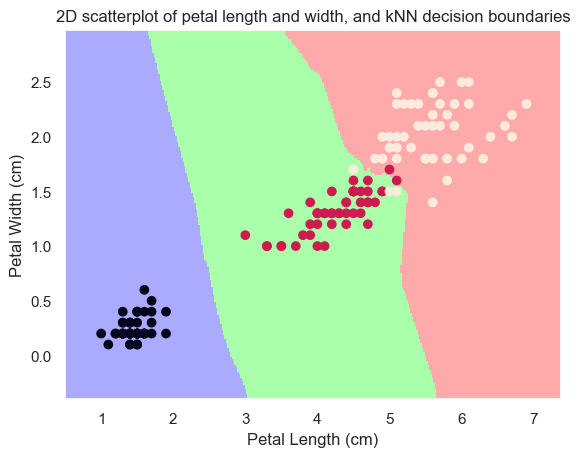

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
x = iris.data[:,2:4]     #X-Axis - petal length-width
y = iris.target          #Y-Axis - species

x_min, x_max = x[:,0].min() - .5,x[:,0].max() + .5
y_min, y_max = x[:,1].min() - .5,x[:,1].max() + .5

#MESH
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#################################################################################
knn = KNeighborsClassifier()
knn.fit(x,y)
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
#################################################################################

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light,shading='auto')


#Plot the training points
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.title('2D scatterplot of petal length and width, and kNN decision boundaries')
plt.show();

In this case the decision boundaries are much more accurate with only few misclassifications, when focusing on the petals only.


# 4. Support Vector Machine (SVM)

SVM classifiers are binary or discriminating models, working on two classes of differentiation. 

 * It is a binary discriminative model.
 * Project observations in a multidimensional space and build decision boundaries that divide these spaces.
 * In the simplest case, we have decision boundaries represented by a plane (in 3D) or by a straight line (in 2D).
 * In more complex cases, the separation surfaces are curved/non-linear shapes.
 * SVMs can be used for both regression with  SVR (Support Vector Regression) and classification with SVC (Support Vector Classification).


### 4.1. Let's start with simplest 2D case 
 
 * Decision boundary is a straight line. 


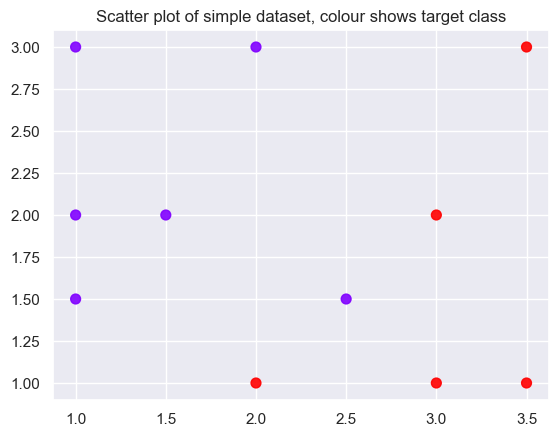

In [39]:
# Imports and data set initialisation 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],  # dummy data containing 11 2-dimensional data points
     [2,1],[3,1],[3,2],[3.5,1],[3.5,3]])                    # in other words, a data set with two variables and 11 samples

y = [0]*6 + [1]*5        # dummy target y contains six 0s and five 1s


plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9,cmap='rainbow')
plt.title("Scatter plot of simple dataset, colour shows target class")
plt.show();


Details on parameters of plt.scatter function can be found here https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

 * Now we have defined the training set, we can use SVC (Support Vector Classification) to draw a linear decision boundary to divide the data into two areas.
 * The straight line will be placed such so as to maximize its distance relative to its closest data points.

In [40]:
# Let's apply the SVC algorithm to the training set.
# We initialise SVC() constructor defining the kernel as linear. (A kernel is a class of algorithms for pattern analysis.) 
# We use the fit() function with the training set as argument.

svc = svm.SVC(kernel='linear').fit(x,y)     # initialise SVC and invoke fit function to train the model

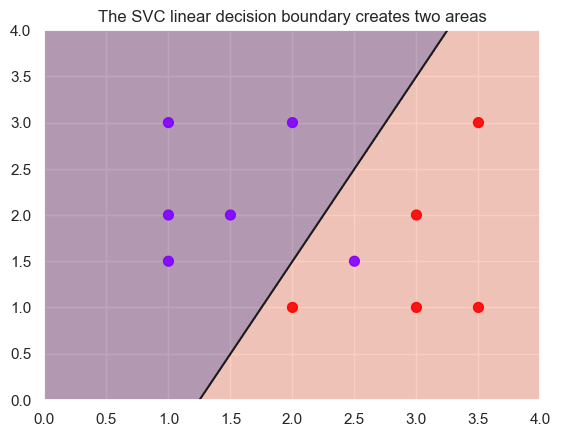

In [41]:
# Once the model is trained, we use the decision_function() function to plot the decision boundary.
# We then draw the scatterplot giving a different colour to the two portions of the decision space.

X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9,cmap='rainbow')
plt.title('The SVC linear decision boundary creates two areas')
plt.show();

* The above Fig linearly divides the area into two data classes. 
* The decision boundary is rather successful since only one 'y' instance has been misclassified.


Further details about SVC classifier parameters can be found here: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### 4.2 Regularisation 

 * As in many other algorithms, we can perform regularisation to influence the decision boundary learnt by the SVC algorithm.
 * In SVC, regularisation can be specified via parameter C, where a lower C value (greater regularisation) means the decision boundary relies on a higher number of data points whereas a higher C value (lower regularization) restricts the decision boundary to data points closer to the decision boundary. 

 * Unless otherwise specified, the default value of C is equal to 1.

In [42]:
# Let's reinitialise the imports and the dummy data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# set up the dummy data
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],
     [2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5

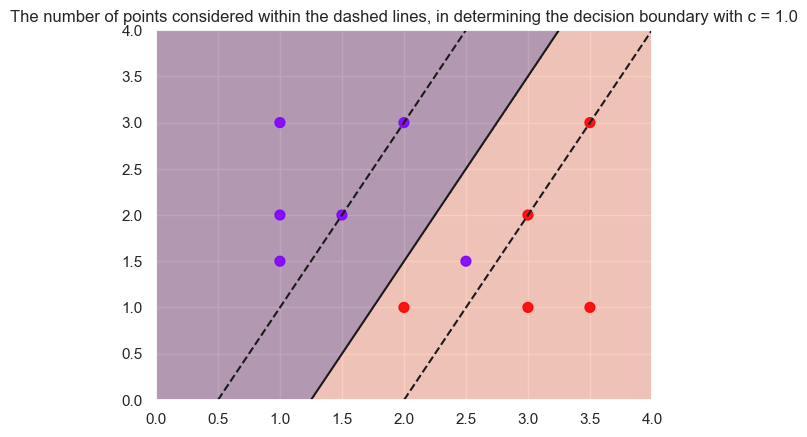

In [43]:
# Apply the SVC algorithm

svc = svm.SVC(kernel='linear',C=1.0).fit(x,y)   # C=1, the default input, represents a large value (lower regularisation)

X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

# plot the output
# We can highlight the data points that were considered in drawing the decision boundary using the support_vectors array.
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
#plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9,cmap='rainbow')

plt.title('The number of points considered within the dashed lines, in determining the decision boundary with c = 1.0')
plt.show();


* The number of points involved in the calculation depends on the C parameter. 
* In the above Fig, the points considered are those within the dashed lines.
* Note the decision boundary is drawn such that it maximises the distance between the two dashed lines.


### Setting C=0.1 (higher regularisation)

Let’s investigate how many data points will now be taken into consideration.


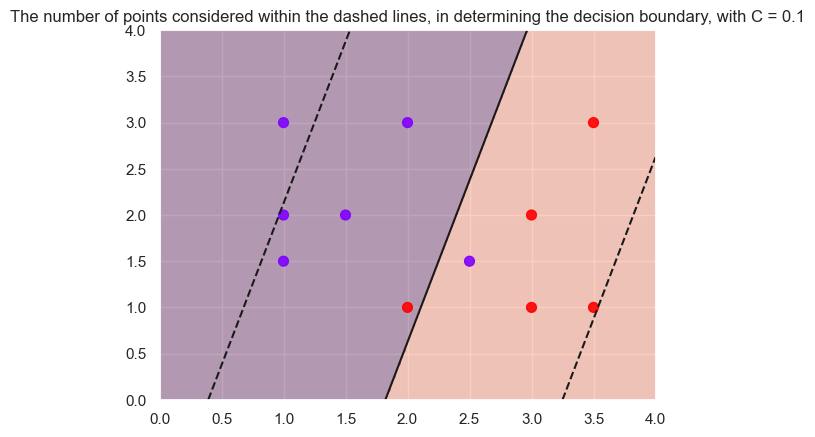

In [44]:
# Initialise the SVC algorithm

svc = svm.SVC(kernel='linear',C=0.1).fit(x,y)   # we now use C=0.1 - smaller value -> higher regularisation.

X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

# plot the output
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
#plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9,cmap='rainbow')

plt.title('The number of points considered within the dashed lines, in determining the decision boundary, with C = 0.1')
plt.show();

* Note that the number of data points taken into consideration has now increased.
* The number of data points involved in determining the decision boundary grows with a decreasing value of C.
* This has influenced the decision boundary.
* But now two points have been misclassified.

### 4.3 Non-linear decision boundary

* So far we have seen how SVC can be used to draw a linear decision boundary.
* More complex SVC algorithms can be used to draw a non-linear decision boundary based on the same principles. 
* For non-linear solutions we will use a polynomial kernel. As the name implies, we use a polynomial curve to separate the areas.
* We can specify the degree of the polynomial curve.
* C continues to represent the coefficient of regularization.


#### SVC using Polynomial kernel

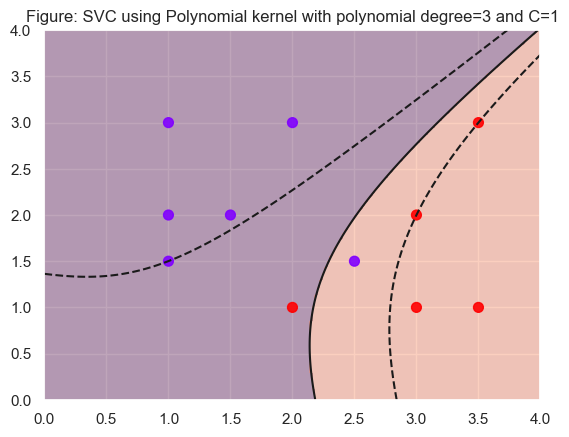

In [45]:
# Let's initialise SVC using a polynomial (instead of a linear) kernel, with polynomial degree = 3
# C coefficient = 1 (default)

svc = svm.SVC(kernel='poly',C=1, degree=3).fit(x,y)

X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

# plot the output
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
#plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9,cmap='rainbow')

plt.title('Figure: SVC using Polynomial kernel with polynomial degree=3 and C=1')
plt.show()

### 4.4 SVC using Radial Basis Function

 * Another type of non-linear kernel is the Radial Basis Function (RBF). 
 * In this case, the separation curves tend to define the zones radially with respect to the observation points of the training set.


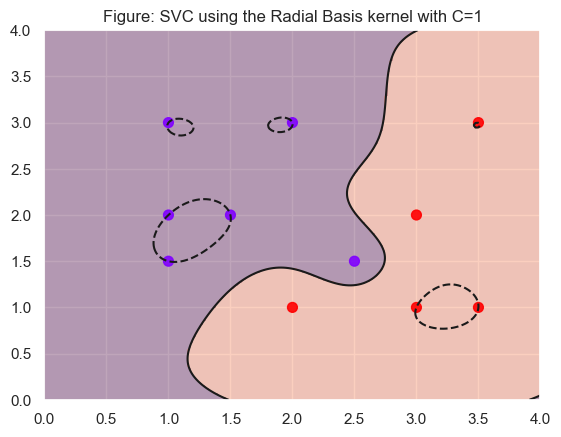

In [46]:
# Using the RBF function, instead of polynomial or linear boundaries.
svc = svm.SVC(kernel='rbf', C=1.0, gamma=3).fit(x,y)

X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

# plot the output
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
#plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9, cmap='rainbow')

plt.title('Figure: SVC using the Radial Basis kernel with C=1')
plt.show();

* There are different ways to perform non-linear regression.
* Note that more complicated ways do not translate to better models (recall overfitting).
* Complicated models may not generalise well to other similar cases.
* We usually want to maximise both simplicity and accuracy.


# 5. Clustering for unsupervised learning
 * KMeans
 * GMM

## 5a. K-Means

* K-Means is an algorithm for **unsupervised clustering**: finds clusters in the data based on the data attributes alone (not the labels). 
* It searches for cluster centers which represent the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

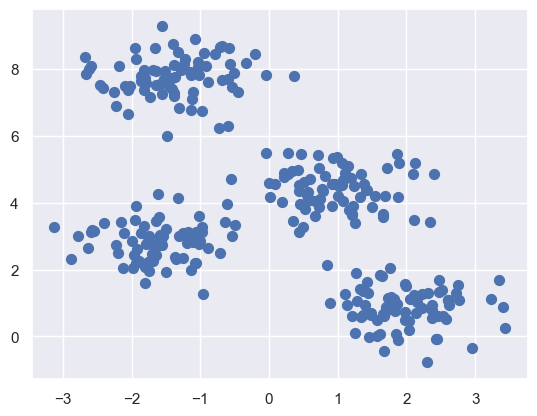

In [47]:
# Let's generate some data using "make_blobs" which automatically generates some random clusters
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, # we specify the samples and centers
                  random_state=0, cluster_std=0.60) # we specify the standard deviation
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show();

* By eye, it is relatively easy to identify the four clusters.

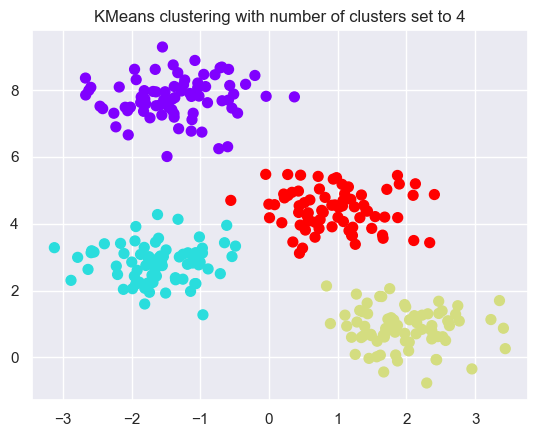

In [48]:
# Initialise K-means and apply it to the above data set.
from sklearn.cluster import KMeans
kmeans = KMeans(4)  # 4 clusters
kmeans.fit(X)
y_kmeans = kmeans.predict(X)  

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');
plt.title("KMeans clustering with number of clusters set to 4")
plt.show();

The algorithm successfully identifies the four clusters in this toy example.

### The K-Means Algorithm: Expectation Maximization

* If we were to perform exhaustive search for the different segmentations of the data, the search space would be exponential in the number of points.
* There is a well-known procudure called the **Expectation Maximization (EM)** that ensures K-Means completes relatively fast.

* Recall from the lecture that EM is a two-step approach:
 
1. Random initialisation of the cluster centers;  
2. Repeat until converged:
 * E-Step : for each data point, find the nearest centroid/cluster and assign data to that centroid.
 * M-Step : recompute the centroid based on new the cluster assignment.   
   

 * The **convergence** of this algorithm is not guaranteed. For that reason, scikit-learn by default performs a large number of **random initializations** to find a solution.
  * This also means you may get different results each time you run the algorithm, although this only applies to complicated problems that might involve a large number of clusters.
 * Recall from the lectures that the number of clusters must be set beforehand - different resuts with different initial guess of number of clusters ...

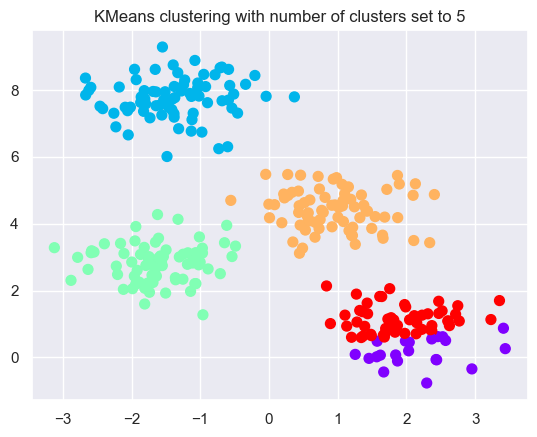

In [49]:
kmeans = KMeans(5, random_state=32)  # assuming 5 clusters gives different results
kmeans.fit(X)
y_kmeans = kmeans.predict(X)  

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');
plt.title("KMeans clustering with number of clusters set to 5")
plt.show();

## 5b. Gaussian Mixture Models (GMMs)

How do GMMs relate to K-Means:

 * Both are unsupervised and do not require class labels to be provided as input;
 * K-Means is performs hard-clustering while GMM performs soft-clustering.
     * i.e., a data point in K-Means can belong to only one cluster, whereas in GMM a data point can belong to multiple clusters, with a probability associated with each cluster.

More details here : http://scikit-learn.org/stable/modules/mixture.html

In [50]:
# Specify necessary imports
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.datasets import make_blobs

Documentation
http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

#### We are going to create "blobs" of points which overlap more, and so where "soft-clustering" might be more appropriate

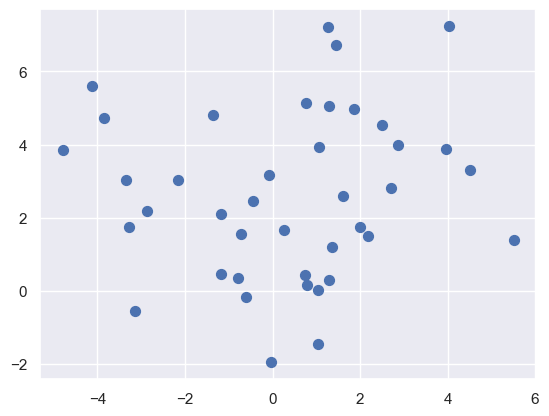

In [51]:
X, y = make_blobs(n_samples=40, centers=3, # we specify the samples and centers
                  random_state=0, cluster_std=2.0) # we specify the standard deviation
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show();

#### In GMM, individual points are mixtures of (in this case, three) Gaussians

Here we initialise GMM with a kmeans phase - in this case we get three fairly well-separated Gaussians

But we can see purpleish and brownish points which are mixtures of two Gaussians

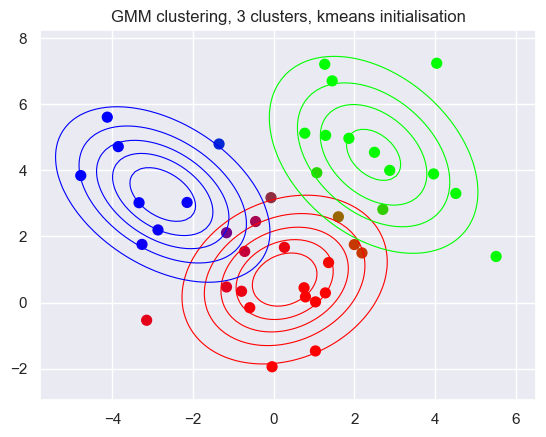

In [52]:

# GMM with random initialisation can give very different results to kmeans - and may give a different result each time you run it

from scipy.stats import multivariate_normal
n_components = 3
gmm1 = mixture.GaussianMixture(n_components=n_components,max_iter=100, init_params='kmeans', random_state=3)
gmm1.fit(X);
y_gmm = gmm1.predict(X)

# This gives probabilities of each row in X belong to each of the three Gaussians

responsibilities = gmm1.predict_proba(X)

# Going to use red, green, blue for the three Gaussians

base_colors = np.array([[1, 0, 0],  # Red
                        [0, 1, 0],  # Green
                        [0, 0, 1]]) # Blue

# Create a grid for contour plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density of each Gaussian at each grid point
densities = np.exp(gmm1.score_samples(grid)).reshape(xx.shape)

# this gives the colour for each point according to the proportions in "responsibilities"

colors = responsibilities @ base_colors  # Matrix multiplication to get RGB mix

plt.scatter(X[:, 0], X[:, 1], c=colors, s=50);
for i in range(n_components):
    mean = gmm1.means_[i]          # Gaussian mean
    cov = gmm1.covariances_[i]     # Gaussian covariance
    rv = multivariate_normal(mean, cov)  # Gaussian distribution

    # Compute density values for grid
    densities = rv.pdf(grid).reshape(xx.shape)

    # Plot contours for this Gaussian
    plt.contour(xx, yy, densities, levels=5, colors=[base_colors[i]], linewidths=0.8)
plt.title('GMM clustering, 3 clusters, kmeans initialisation')
plt.show();

#### If we use a random inititialisation for GMM, in this example we get quite different Gaussians which overlap more, and so with many more "mixed" points

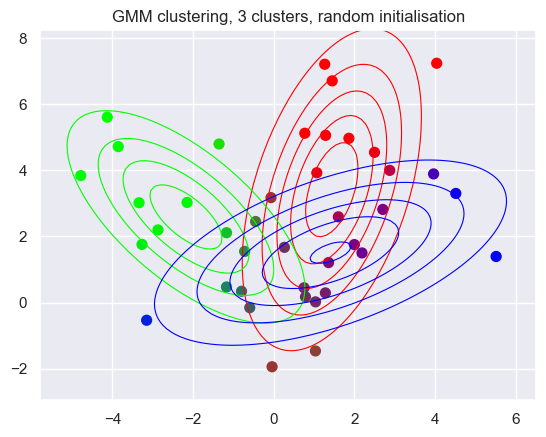

In [53]:
from scipy.stats import multivariate_normal
n_components = 3
gmm1 = mixture.GaussianMixture(n_components=n_components,max_iter=100, init_params='random', random_state=3)
gmm1.fit(X);
y_gmm = gmm1.predict(X)

responsibilities = gmm1.predict_proba(X)

base_colors = np.array([[1, 0, 0],  # Red
                        [0, 1, 0],  # Green
                        [0, 0, 1]]) # Blue

# Create a grid for contour plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute density of each Gaussian at each grid point
densities = np.exp(gmm1.score_samples(grid)).reshape(xx.shape)

colors = responsibilities @ base_colors  # Matrix multiplication to get RGB mix
plt.scatter(X[:, 0], X[:, 1], c=colors, s=50);
for i in range(n_components):
    mean = gmm1.means_[i]          # Gaussian mean
    cov = gmm1.covariances_[i]     # Gaussian covariance
    rv = multivariate_normal(mean, cov)  # Gaussian distribution

    # Compute density values for grid
    densities = rv.pdf(grid).reshape(xx.shape)

    # Plot contours for this Gaussian
    plt.contour(xx, yy, densities, levels=5, colors=[base_colors[i]], linewidths=0.8)
plt.title('GMM clustering, 3 clusters, random initialisation')
plt.show();